<a href="https://colab.research.google.com/github/anjaliSilawat/Twitter-Sentiment-Analysis/blob/main/Anjali_Silawat_Twitter__Sentiment_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis ✒**

# **Set Up the Environment**

In [2]:
# Import necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # For regular expressions
import os

In [39]:
# Import libraries for text processing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from collections import Counter
import logging
import time
import pickle
import itertools
import seaborn as sns

In [48]:
# Import nltk for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# Download stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Load the Dataset**

In [7]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [8]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 68% 55.0M/80.9M [00:00<00:00, 155MB/s]
100% 80.9M/80.9M [00:00<00:00, 156MB/s]


In [9]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [11]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"



In [12]:
dataframe = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding =('ISO-8859-1'),names=DATASET_COLUMNS)

In [13]:
print(dataframe)

         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

In [14]:
dataframe.shape

(1600000, 6)

In [15]:
print("Dataset size:", len(dataframe))

Dataset size: 1600000


In [16]:
dataframe.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [17]:
dataframe.tail(10)

,target,ids,date,flag,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


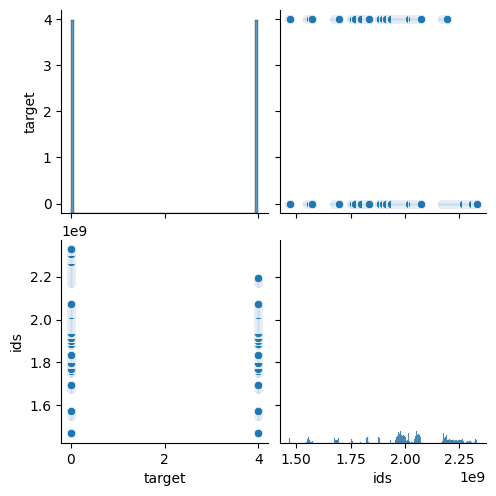

In [18]:
#The command sns.pairplot(dataframe) is used to create a pair plot, also known as a scatterplot matrix, using the Seaborn library.
sns.pairplot(dataframe)

## **Check for missing values in the dataset**

In [19]:
print("Missing values in each column:")
print(dataframe.isna().sum())



Missing values in each column:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


## **Identify and print duplicate rows**

In [20]:
duplicate = dataframe[dataframe.duplicated()]
print("Duplicate Rows :")
print(duplicate)

Duplicate Rows :
Empty DataFrame
Columns: [target, ids, date, flag, user, text]
Index: []


## **Count the occurrences of each sentiment in the target column**

In [21]:
target_cnt = Counter(dataframe['target'])
print("Sentiment counts:")
print(target_cnt)

Sentiment counts:
Counter({0: 800000, 4: 800000})


## **Visualize the distribution of sentiments**

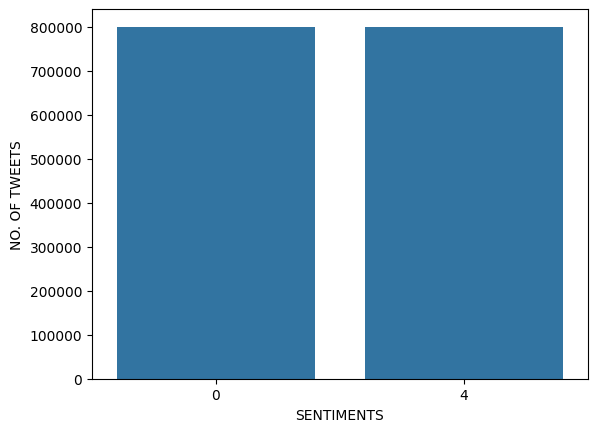

In [22]:
sent = sns.countplot(x=dataframe['target'])
sent.set(xlabel='SENTIMENTS')
sent.set(ylabel='NO. OF TWEETS')
plt.show()


## **Select only the numeric columns from the dataframe**

In [25]:
numeric_df = dataframe.select_dtypes(include=[np.number])

## **Calculate and add a new column for the length of each tweet**

In [23]:
dataframe['Tweet Length'] = dataframe['text'].astype(str).apply(len)

## **Calculate the correlation matrix for the numeric columns**


In [26]:
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                target       ids  Tweet Length
target        1.000000 -0.261601     -0.005809
ids          -0.261601  1.000000      0.002562
Tweet Length -0.005809  0.002562      1.000000


## **Compute the correlation between tweet length and target sentiment**

In [27]:
correlation = dataframe['Tweet Length'].corr(dataframe['target'])
print(f"Correlation between Tweet Length and Target: {correlation}")

Correlation between Tweet Length and Target: -0.00580878708480654


## **Visualize the correlation using a heatmap**

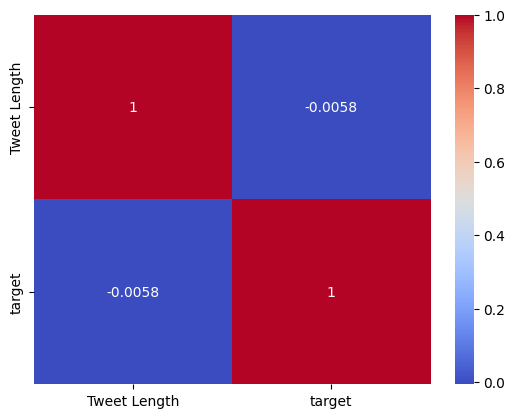

In [28]:
sns.heatmap(dataframe[['Tweet Length', 'target']].corr(), annot=True, cmap='coolwarm')
plt.show()

## **Replace target values with labels**

In [29]:
label_mapping = {'negative': 0, 'positive': 4, 'neutral': 2}
dataframe['target'] = dataframe['target'].replace(label_mapping)

## **One-hot encode the target column**

In [30]:
encoded_df = pd.get_dummies(dataframe, columns=['target'])
print("One-Hot Encoded DataFrame:")
print(encoded_df.head())

One-Hot Encoded DataFrame:
          ids                          date      flag             user  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                text  Tweet Length  target_0  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...           115      True   
1  is upset that he can't update his Facebook by ...           111      True   
2  @Kenichan I dived many times for the ball. Man...            89      True   
3    my whole body feels itchy and like its on fire             47      True   
4  @nationwideclass no, it's not behaving at all....           111      True   

   target_4  
0     False  
1     False  
2    

## **Encode emojis in tweets**


In [32]:
# Install the emoji library
!pip install emoji

# Import the emoji library
import emoji

# Define a function to encode emojis into text
def encode_emojis(text):
    return emoji.demojize(text)

# Define a function to remove emojis from the text
def remove_emojis(text):
    return emoji.get_emoji_regexp().sub('', text)

# Apply the encoding function to the 'text' column of the dataframe
dataframe['Encoded_Text'] = dataframe['text'].apply(encode_emojis)

# Print the updated dataframe with encoded text
print("DataFrame with Encoded Text:")
print(dataframe.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 10.0 MB/s eta 0:00:00
DataFrame with Encoded Text:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

   Tweet Length                                       Encode

## **Preprocessing: remove punctuation and split the text**

In [34]:
d = ",.!?/&-:;@'..."
s = dataframe['text'].iloc[0]
s = ' '.join(w for w in re.split("[" + "\\".join(d) + "]", s) if w)



## **Split the data into train and test sets**

In [35]:
x = dataframe.text.values
y = dataframe.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

## **Feature Engineering: Vectorize the text data**

In [36]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

print("Before vectorizing:\n", x_train[0], '\nAfter vectorizing:\n', X_train[0])

Before vectorizing:
 It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming?  
After vectorizing:
   (0, 56126)	1
  (0, 57443)	1
  (0, 126950)	1
  (0, 129399)	1
  (0, 132544)	1
  (0, 142868)	1
  (0, 226851)	1
  (0, 251981)	1
  (0, 256885)	1
  (0, 257700)	1
  (0, 257841)	1
  (0, 433424)	1
  (0, 455284)	1
  (0, 467402)	1
  (0, 486023)	1
  (0, 501487)	1
  (0, 517082)	1
  (0, 519964)	1
  (0, 528707)	1
  (0, 558260)	1
  (0, 561897)	1
  (0, 562752)	1
  (0, 565913)	1
  (0, 566694)	1


## **Create and train the Logistic Regression model**

In [47]:

# Use MaxAbsScaler for sparse data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model
classifier = LogisticRegression(max_iter=1000)

# Train the model on the scaled data
classifier.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

## **Predict on test data**

In [49]:
y_pred = classifier.predict(X_test_scaled)

## **Evaluate the model**

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.800296875
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160321
           4       0.79      0.81      0.80    159679

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



## **Evaluate the model**

In [51]:
score = classifier.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 0.77848125


## **Testing with a sample tweet**

In [52]:
tweet = 'my whole body feels itchy and like it\'s on fire'
vectTweet = vectorizer.transform(np.array([tweet]))
prediction = classifier.predict(vectTweet)
print('Tweet is', 'positive' if prediction[0] == 4 else 'negative')

Tweet is negative


## **Testing with multiple sample tweets**

In [53]:
tweetlist = ["spring break in plain city... it's snowing", "Mondays are the worst..."]
vectTweet = vectorizer.transform(np.array(tweetlist))
prediction = classifier.predict(vectTweet)
for enum, i in enumerate(tweetlist):
    print(i, '----> This tweet is', 'positive' if prediction[enum] == 4 else 'negative')

spring break in plain city... it's snowing ----> This tweet is positive
Mondays are the worst... ----> This tweet is negative


## **Generate predictions and create a confusion matrix**

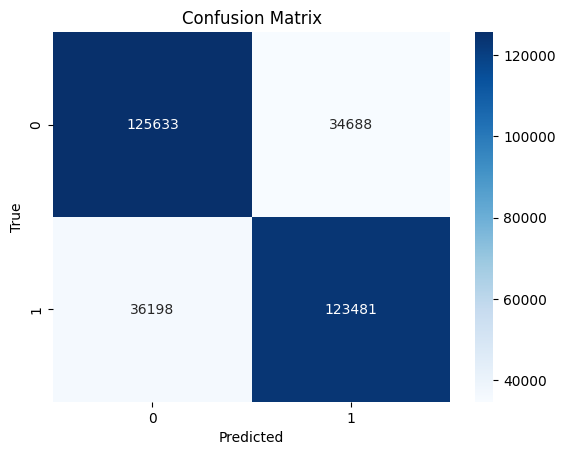

In [54]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Calculate the total number of cells in the notebook**

In [55]:
code_cells = len([cell for cell in get_ipython().kernel.shell.user_ns['In'] if cell])
markdown_cells = len([cell for cell in get_ipython().kernel.shell.user_ns['Out'] if cell == ''])
total_cells = code_cells + markdown_cells
print(f"Total number of cells: {total_cells}")

Total number of cells: 55
